In [1]:
!pip install Pillow # used to resize images

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import random
import shutil
import time

from google.colab import drive
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf

### Download the starter CSV

In [4]:
# Starter code to download small files
# Use this to download your starter CSV in notebook one and two.
# Also use it to download your thumbnails.zip in notebook two.
def download_if_missing(url, target, extract=True):
  if os.path.exists(target):
    return target
  return tf.keras.utils.get_file(target, origin=url, extract=extract)

In [5]:
colab_root = "/content/" 
csv_path = os.path.join(colab_root, "starter2.csv")
download_if_missing("https://storage.googleapis.com/applied-dl/mini-vqa/starter2.csv",
                     csv_path)

1335296/1329146 [==============================] - 0s 0us/step


'/content/starter2.csv'

### Download and unzip your thumbnails

In [6]:
# Your code here
# Add a path to the zip you created and hosted on the cloud, above 
YOUR_THUMBNAILS_URL = 'https://storage.googleapis.com/coms4995_zl2822/thumbnails.zip'

In [7]:
thumbnails_file = os.path.join(colab_root, "thumbnails.zip")
images_folder = os.path.join(colab_root, 'thumbnails/')
download_if_missing(YOUR_THUMBNAILS_URL,
                    thumbnails_file,
                    extract=False)

267878400/267874499 [==============================] - 1s 0us/step


'/content/thumbnails.zip'

In [8]:
!unzip -q $thumbnails_file -d $images_folder

In [9]:
!ls $images_folder

Streaming output truncated to the last 5000 lines.
COCO_train2014_000000141695.jpg  COCO_train2014_000000430061.jpg
COCO_train2014_000000141702.jpg  COCO_train2014_000000430065.jpg
COCO_train2014_000000141710.jpg  COCO_train2014_000000430086.jpg
COCO_train2014_000000141712.jpg  COCO_train2014_000000430094.jpg
COCO_train2014_000000141718.jpg  COCO_train2014_000000430142.jpg
COCO_train2014_000000141785.jpg  COCO_train2014_000000430149.jpg
COCO_train2014_000000141825.jpg  COCO_train2014_000000430166.jpg
COCO_train2014_000000141842.jpg  COCO_train2014_000000430192.jpg
COCO_train2014_000000141848.jpg  COCO_train2014_000000430193.jpg
COCO_train2014_000000141850.jpg  COCO_train2014_000000430205.jpg
COCO_train2014_000000141855.jpg  COCO_train2014_000000430249.jpg
COCO_train2014_000000141857.jpg  COCO_train2014_000000430281.jpg
COCO_train2014_000000141860.jpg  COCO_train2014_000000430285.jpg
COCO_train2014_000000141874.jpg  COCO_train2014_000000430315.jpg
COCO_train2014_000000141922.jpg  COCO_t

### Sanity check

In [10]:
import csv
data = []
with open('starter2.csv') as myfile:
    reader = csv.reader(myfile, delimiter=',')
    for row in reader:
        question, answer, image = row
        data.append([question, answer, image])

In [11]:
for question, answer, image_name in data:
    img_path = os.path.join(images_folder, image_name)
    assert os.path.exists(img_path)

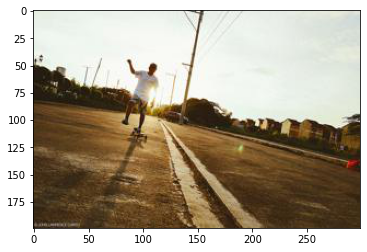

can one go on a skateboard with just one leg 
answer: yes


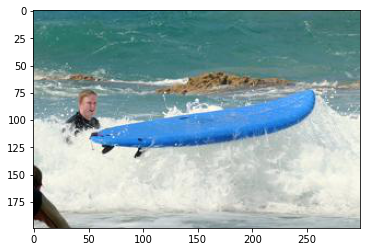

is the person talking 
answer: no


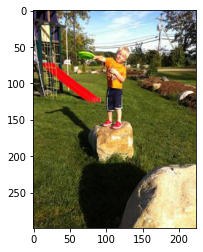

is this child on a farm 
answer: no


In [12]:
for i in range(3):
    question, answer, image = data[random.randint(0,20000)]
    img_path = os.path.join(images_folder, image)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()
    print(question, '\nanswer:', answer)

### Convert image names to absolute paths and Convert answers to numeric format

In [13]:
# Your code here
# Convert the answers column in the starter CSV to 1.0 and 0.0
# You do not need to update the CSV itself. If you have a data structure
# in memory, you can work with that instead.

# Convert the image filenames in the starter CSV to absolute paths
# You do not need to update the CSV itself. If you have a data structure
# in memory, you can work with that instead.

for i in range(len(data)):
    question, answer, image_name = data[i]
    data[i][2] = os.path.join(images_folder, image_name) # Convert the image filenames in the starter CSV to absolute paths
    if answer == 'yes': # Convert the answers column in the starter CSV to 1.0 and 0.0
        data[i][1] = 1.0
    else :
        data[i][1] = 0.0

### Shuffle and create a test set

In [14]:
# Your code here
# Shuffle the starter CSV
# Remove 4,000 rows (or so) and move them to a separate file or data structure
random.shuffle(data)
test_data = data[16000:]

### Limit the size of the dataset, and balance

### Create training and validation sets

In [15]:
# Your code here
# The scikit-learn utilities (train_test_split) are your friend
train_data, val_data = train_test_split(data, test_size = 0.2)

# check the length of each dataset
print(len(train_data))
print(len(test_data))
print(len(val_data))

16000
4000
4000


### Verify your train and validation sets look as expected.

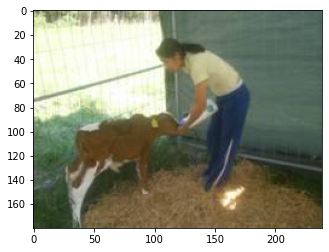

does the girl have tattoos 
answer: 0.0


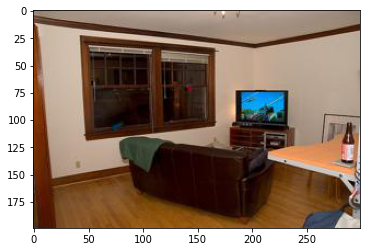

is that a modern television 
answer: 1.0


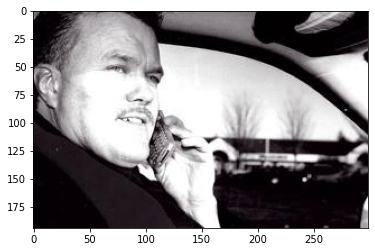

does the man have a mustache 
answer: 1.0


In [16]:
for i in range(3):
    question, answer, img_path = train_data[random.randint(0,16000)]
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()
    print(question, '\nanswer:', answer)

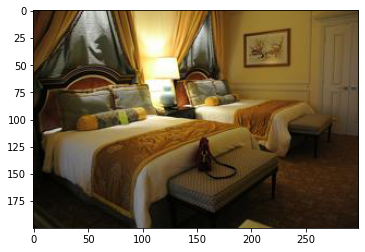

are the walls done in a summery color 
answer: 1.0


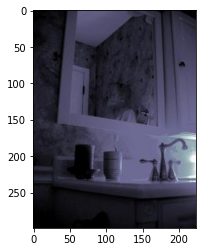

is there a curling iron in the picture 
answer: 0.0


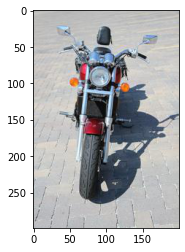

are the mirrors the same color as the seat 
answer: 0.0


In [17]:
for i in range(3):
    question, answer, img_path = val_data[random.randint(0,4000)]
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()
    print(question, '\nanswer:', answer)

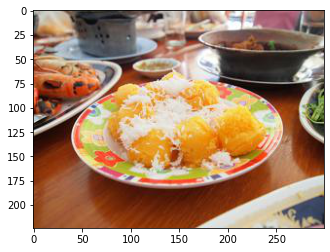

is there meat in this picture 
answer: 1.0


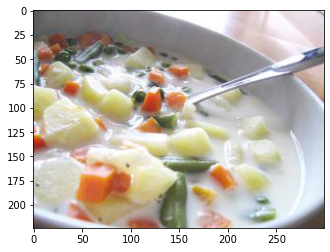

is there meat in this soup 
answer: 0.0


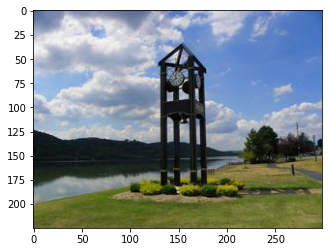

is anybody swimming 
answer: 0.0


In [18]:
for i in range(3):
    question, answer, img_path = test_data[random.randint(0,4000)]
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()
    print(question, '\nanswer:', answer)


### Forward your images through InceptionV3, and cache activations to disk

In [19]:
# Create a feature extraction model.
# You should not need to modify this (though you may, if you'd like
# to use a model other than Inception).
image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output
image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

87916544/87910968 [==============================] - 2s 0us/step


In [20]:
# A method to load an image off disk, and extract activations using 
# the model above. You should not need to modify this.
def image_to_activations(image_path):
  img = tf.io.read_file(image_path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, (299, 299))
  activations = tf.keras.applications.inception_v3.preprocess_input(img)
  return activations, image_path

In [21]:
# Your code here
# You'll need to extract activations for every image in your train, validation,
# and test set. First, create a set of the absolute paths to all of these images 
# (image_path_set). Populate this with the absolute paths to all these images.
image_path_set = np.array(data)[:, 2]


print("Images to preprocess", len(image_path_set))
print("This make take a few minutes")

Images to preprocess 20000
This make take a few minutes


In [22]:
# This cell will extract activations for each image and save them to disk 
# in NumPy format. You should not need to modify this.

# Note: we're not saving these activations to the cloud,
# but you certainly could if you wanted to skip this step 
# in the future. If you look into doing that, it's best to save one large
# zip with the activations, and download that and extract it locally
# (rather than doing a bunch of network access to retrieve individual files),
# especially when training your model.

# Create a dataset to load each image off disk, and extract activations
activation_dataset = tf.data.Dataset.from_tensor_slices(list(image_path_set))
activation_dataset = activation_dataset.map(
  image_to_activations, 
  num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(32)

# Save all activations to disk in NumPy format
for img_batch, path_batch in activation_dataset:
  batch_features = image_features_extract_model(img_batch)
  for bf, p in zip(batch_features, path_batch):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())  

### Create lists of questions, answers, and images for your train, validation, and test set

In [23]:
# Your code here. Populate these for your training set.
questions_train = np.array(train_data)[:,0] # a list of questions in your training set
answers_train = [x[1] for x in train_data] # a list of answers (in numeric format) in your training set
images_train = np.array(train_data)[:,2] # a list of absolute paths to images in your training set

# The order of these lists should match (e.g. the question, answer, and image 
# from row i of your train split of the starter CSV should be 
# questions_train[i], answers_train[i], images_train[i]).

# Your code here. Populate these for your validation set.
questions_val = np.array(val_data)[:,0]
answers_val = [x[1] for x in val_data]
images_val = np.array(val_data)[:,2]

# Your code here. Populate these for your test set
questions_test = np.array(test_data)[:,0]
answers_test = [x[1] for x in test_data]
images_test = np.array(test_data)[:,2]

### Create and fit a tokenizer

In [24]:
# Your code here
VOCAB_SIZE = 600

# You should not need to modify this code
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(questions_train)

# Note, the tokenizer's word_index will not respect VOCAB_SIZE.
# but, that parameter will be respected in later methods,
# (for example, when you call text_to_sequences).
# Also note that '0' is a reserved index for padding.
print("Word index", len(tokenizer.word_index))

Word index 5497


### Vectorize the questions



In [25]:
# Your code here
# Use the texts_to_sequences utility to vectorize your training, 
# validation, and test questions. 

# To follow along with the starter code below, you should use
# these naming conventions

sequences_train = tokenizer.texts_to_sequences(questions_train)
sequences_val = tokenizer.texts_to_sequences(questions_val)
sequences_test = tokenizer.texts_to_sequences(questions_test)

### Pad sequences

In [26]:
# Your code here
# To choose a reasonable sequence length, examine the length of all the 
# tokenized questions in the training set (in words).
# Justify your choice, e.g. you should note that percentage of the 
# training questions that fall under that length (and will not be trimmed), 
# and the number of questions that will be.
print (max([(len(x),x) for x in sequences_train]))
print (max([(len(x),x) for x in sequences_val]))
print (max([(len(x),x) for x in sequences_test]))

(19, [2, 23, 26, 1, 128, 8, 1, 163, 11, 502, 1, 65, 27, 2, 129, 6, 245, 10, 592])
(16, [2, 1, 6, 1, 337, 1, 35, 402, 162, 1, 8, 1, 174, 157, 1, 337])
(17, [17, 20, 232, 45, 12, 582, 45, 3, 180, 10, 447, 153, 6, 50, 428, 88, 317])


In [27]:
# Your code here
MAX_SEQ_LEN = 15
# Your code here
# Use the pad_sequences utility to pad your training, 
# validation, and test questions.

# To follow along with the rest of the statter code, you can use these
# naming conventions

padded_train = tf.keras.preprocessing.sequence.pad_sequences(sequences_train, MAX_SEQ_LEN)
padded_val = tf.keras.preprocessing.sequence.pad_sequences(sequences_val, MAX_SEQ_LEN)
padded_test = tf.keras.preprocessing.sequence.pad_sequences(sequences_test, MAX_SEQ_LEN)

### Create a tf.dataset for training, validation, and testing




In [28]:
# You should not need to modify this.
BATCH_SIZE = 32
BUFFER_SIZE = 1000

# You should not need to modify this.
# Load cached activations off disk.
def load_np(img_path, question, answer):
  activations = np.load(img_path.decode('utf-8')+'.npy')
  return activations, question, answer, img_path

In [29]:
# You should not need to modify this.

# This method will create a dataset that returns four elements.
# - a batch of activations (loaded from disk)
# - a batch of padded questions
# - a batch of numeric answers
# - a batch of absolute paths to the corresponding images
def create_dataset(images, sequences, answers):
  dataset = tf.data.Dataset.from_tensor_slices((images, 
                                                sequences, 
                                                answers))
  # Load the cached activations off disk
  # Note: This is not the clearest code in the world (it's on our list to 
  # update on the website, so it's implemented for you in this assignment)
  dataset = dataset.map(lambda x, y, z: tf.numpy_function(
      load_np, [x, y, z], [tf.float32, tf.int32, tf.float32, tf.string]),
      num_parallel_calls=tf.data.experimental.AUTOTUNE)
  
  # Shuffle and batch
  dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
  dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
  return dataset

In [30]:
# Your code here

# Call the above method to create train, val, and test datasets.
# If you want to follow along with the starter code, I suggest these
# variable names:

train_ds = create_dataset(images_train, padded_train, answers_train)
val_ds = create_dataset(images_val, padded_val, answers_val)
test_ds = create_dataset(images_test, padded_test, answers_test)

### Sanity check (optional)

In [31]:
# Your code here (optional)
# Verify your datasets are working properly
my_iterator = iter(train_ds)
activations_batch, questions_batch, answers_batch, paths_batch = next(my_iterator)

print(activations_batch.shape, 
      questions_batch.shape, 
      answers_batch.shape, 
      paths_batch.shape)

(32, 8, 8, 2048) (32, 15) (32,) (32,)


### Define your VQA model

In [32]:
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input, LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential

In [33]:
# Your code here
# Below is starter code for your model for you to complete.
# See https://keras.io/getting-started/functional-api-guide/ for the idea.
# The vision model is written for you. You will need to write the question
# model.

# Input to your vision model (activations from Inception-V3,
# loaded off disk disk by the dataset above).
image_input = Input(shape=(8, 8, 2048)) 
vision_model = Sequential()
# Used to reduce the number of parameters (rather using a dense layer here).
vision_model.add(tf.keras.layers.GlobalAveragePooling2D())
# Output of your vision model
encoded_image = vision_model(image_input) 

# Your code here
# Write your test processing model that takes the vectorized and padded
# question as input.
# As in the guide above, you will want to produce an `encoded_question`
# as output
question_input = Input(shape=(MAX_SEQ_LEN,), dtype='int32') # your code
embedded_question = Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=MAX_SEQ_LEN)(question_input) # your code
encoded_question = LSTM(128)(embedded_question) # your code

# Concatenate the encoded image and question
merged = tf.keras.layers.concatenate([encoded_image, encoded_question])

# Optionally, add a small dense layer
dense = Dense(32,activation='sigmoid')(merged)

# Next, add a binary classifier on top
output = Dense(1, activation='sigmoid')(dense)

# Your final model
model = Model(inputs=[image_input, question_input], outputs=output)

In [34]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 8, 8, 2048)] 0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 15, 128)      703744      input_3[0][0]                    
__________________________________________________________________________________________________
sequential (Sequential)         (None, 2048)         0           input_2[0][0]                    
_______________________________________________________________________________________

In [35]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Plot your model

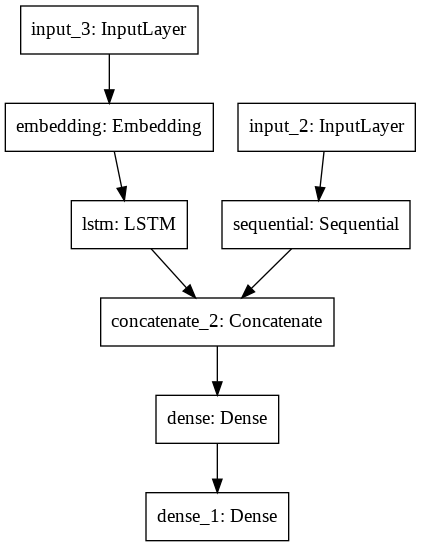

In [36]:
# You should not need to modify this.
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

### Fit your model on a single batch


In [37]:
# You should not nee to modify this.
# Retrieve a batch of data from your train dataset
activations_batch, questions_batch, answers_batch, paths_batch = next(iter(train_ds))

In [38]:
# Your code here

# Train them model repeatedly using model.train_on_batch
# Verify the loss goes to zero after +/- 100 training steps.
# If it does not, now would be a great time to debug 
# before proceeding further.

# e.g.
metrics = model.train_on_batch([activations_batch, questions_batch],answers_batch)
#metrics is a list (loss is metrics[0], accuracy is metrics[1])

### Use your model to make predictions on the same batch above

In [39]:
# You should not need to modify this, but you will want to 
# carefully inspect the output.
for prediction, answer in zip(model.predict(x=[activations_batch, questions_batch]), answers_batch):
  print(prediction, answer.numpy())

[0.48299968] 0.0
[0.6072329] 1.0
[0.6758516] 1.0
[0.5400507] 0.0
[0.622804] 1.0
[0.7381425] 1.0
[0.6592341] 0.0
[0.6397748] 1.0
[0.66734725] 0.0
[0.69850725] 1.0
[0.56404096] 0.0
[0.6966888] 1.0
[0.5999996] 0.0
[0.7165998] 1.0
[0.65405345] 1.0
[0.7373444] 1.0
[0.6449504] 1.0
[0.63041836] 0.0
[0.60508674] 0.0
[0.626567] 0.0
[0.64290994] 0.0
[0.7080553] 1.0
[0.56467444] 0.0
[0.56714684] 0.0
[0.6660943] 1.0
[0.6311313] 0.0
[0.67428154] 1.0
[0.62924665] 0.0
[0.66219395] 0.0
[0.54958326] 0.0
[0.67172986] 1.0
[0.6918232] 1.0


### Create a checkpoints directory

In [40]:
save_root = '/content/'

In [41]:
# If you'd like to save checkpoints in drive, you will need to uncomment
# the code below. Alternatively, you can modify it to save
# checkpoints in Colab (these will not persist if your instance is terminated,
# but you can manually download them if you like).
checkpoint_dir = os.path.join(save_root, "checkpoints")
checkpoint_dir = os.path.join(checkpoint_dir, "hw4")

# Used for formatting
checkpoint_path = os.path.join(checkpoint_dir, "cp-{epoch:08d}.ckpt")

In [42]:
# Your code here
# Uncomment this if you'd like to create a checkpoints folder in your drive
print("Checkpoints directory is", checkpoint_dir)
if os.path.exists(checkpoint_dir):
    print("Checkpoints folder already exists")
else:
    print("Creating a checkpoints directory")
    os.makedirs(checkpoint_dir)

Checkpoints directory is /content/checkpoints/hw4
Creating a checkpoints directory


### Restore the latest checkpoint (if it exists).

In [43]:
# You should not need to modify this code.
latest = tf.train.latest_checkpoint(checkpoint_dir)
if latest != None:
  print("Loading weights from", latest)
  model.load_weights(latest)
else:
  print("Checkpoint not found. Starting from scratch")

Checkpoint not found. Starting from scratch


### Metrics

In [44]:
# Utilities to help us record metrics.
# You should not need to modify this code
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.Mean(name='train_accuracy')

val_loss = tf.keras.metrics.BinaryCrossentropy(name='val_loss')
val_accuracy = tf.keras.metrics.BinaryAccuracy(name='val_accuracy')

### Code to evaluate on the validation dataset

In [45]:
# You should not need to modify this.
def evaluate(max_steps=None):
  steps = 0
  for activation_batch, question_batch, answer_batch, path_batch in val_ds:
    if max_steps != None and steps == max_steps:
      break
    predictions = model.predict(x=[activation_batch, question_batch])
    steps += 1 
    # Record metrics after each batch
    val_loss(answer_batch, predictions)
    val_accuracy(answer_batch, predictions)

### Train the model


In [46]:
# Your code here
# Complete this cell (there are only a few parts to write)

# Used to track loss and accuracy as we go
# You should not need to modify these
train_loss_history, train_acc_history = [], []
val_loss_history, val_acc_history = [], []

epochs = 20 # Your code here

# Training loop
for epoch in range(epochs):

  start = time.time()

  # Train for one epoch
  for activation_batch, question_batch, answer_batch, path_batch in train_ds:
    result = model.train_on_batch(x=[activation_batch, question_batch], y=answer_batch)

    # Record metrics after each batch
    train_loss(result[0])
    train_accuracy(result[1])

  # Evaluate for a few steps
  evaluate(max_steps=100)

  # Print progress
  # You should not need to modify this.
  template = 'Epoch {}, Loss: {:.2f}, Accuracy: {:.2f}, Val Loss {:.2f}, Val Accuracy {:.2f}, Time: {:.1f} secs'
  print(template.format(epoch,
                        train_loss.result(),
                        train_accuracy.result() * 100,
                        val_loss.result(),
                        val_accuracy.result() * 100,
                        time.time() - start))
  
  # Record history
  train_loss_history.append(train_loss.result())
  train_acc_history.append(train_accuracy.result() * 100)
  val_loss_history.append(val_loss.result())
  val_acc_history.append(val_accuracy.result() * 100)

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  val_loss.reset_states()
  val_accuracy.reset_states()

  # Your code here
  # Save a checkpoint after each epoch
  print("Saving weights")
  model.save_weights(checkpoint_dir)

Epoch 0, Loss: 0.70, Accuracy: 50.75, Val Loss 0.69, Val Accuracy 53.28, Time: 263.4 secs
Saving weights
Epoch 1, Loss: 0.68, Accuracy: 56.96, Val Loss 0.69, Val Accuracy 54.47, Time: 293.0 secs
Saving weights
Epoch 2, Loss: 0.67, Accuracy: 60.03, Val Loss 0.69, Val Accuracy 54.75, Time: 293.1 secs
Saving weights
Epoch 3, Loss: 0.66, Accuracy: 61.15, Val Loss 0.70, Val Accuracy 54.41, Time: 293.0 secs
Saving weights
Epoch 4, Loss: 0.64, Accuracy: 62.88, Val Loss 0.71, Val Accuracy 54.28, Time: 296.8 secs
Saving weights
Epoch 5, Loss: 0.63, Accuracy: 64.18, Val Loss 0.72, Val Accuracy 54.97, Time: 301.4 secs
Saving weights
Epoch 6, Loss: 0.62, Accuracy: 65.93, Val Loss 0.72, Val Accuracy 54.12, Time: 304.4 secs
Saving weights
Epoch 7, Loss: 0.61, Accuracy: 67.06, Val Loss 0.72, Val Accuracy 54.66, Time: 307.5 secs
Saving weights
Epoch 8, Loss: 0.60, Accuracy: 68.19, Val Loss 0.75, Val Accuracy 54.38, Time: 300.1 secs
Saving weights
Epoch 9, Loss: 0.58, Accuracy: 69.18, Val Loss 0.75, Va

### Create plots of your training and validation loss and accuracy

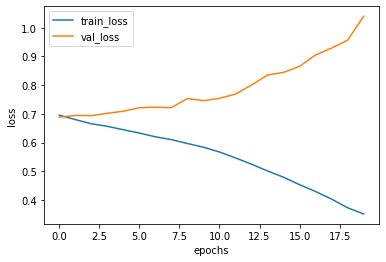

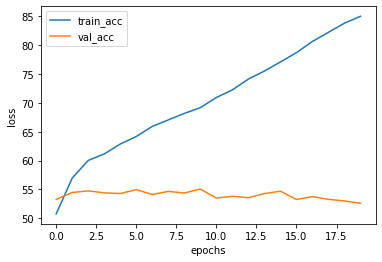

In [47]:
# Your code here
ep = [x for x in range(epochs)]
# plot loss
plt.plot(ep,train_loss_history,label='train_loss')
plt.plot(ep,val_loss_history,label='val_loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# plot accuracy
plt.plot(ep,train_acc_history,label='train_acc')
plt.plot(ep,val_acc_history,label='val_acc')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

### Writen response
How would you improve the accuracy on the validation set? Please list three ideas below.

#### TODO: your answer here

1.   Expand training set with data augmentation.
2.   Check whether data shuffling is proper, ensuring class balance in train val split
3.   Try RNN and reducing NN depth.
4.   Try to use drop out.









### Finally, evaluate your model on the test set

In [48]:
def evaluate_test():
  for activation_batch, question_batch, answer_batch, path_batch in test_ds:
    predictions = model.predict(x=[activation_batch, question_batch])
    steps += 1 
    # Record metrics after each batch
    test_loss(answer_batch, predictions)
    test_accuracy(answer_batch, predictions)

In [49]:
test_loss = tf.keras.metrics.BinaryCrossentropy(name='test_loss')
test_accuracy = tf.keras.metrics.BinaryAccuracy(name='test_accuracy')
print("Evaluate on test data")
evaluate()
template = 'Test Loss {:.2f}, Test Accuracy {:.2f}'
print(template.format(val_loss.result(),val_accuracy.result() * 100))

Evaluate on test data
Test Loss 1.02, Test Accuracy 52.95
